# Exploratory Data Analysis

Descriptive statistics, plots and sanity checks of the final dataset.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("data/twitch-data-all.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   channel              1000 non-null   object 
 1   watch_time_minutes   1000 non-null   int64  
 2   stream_time_minutes  1000 non-null   int64  
 3   peak_viewers         1000 non-null   int64  
 4   average_viewers      1000 non-null   int64  
 5   followers            1000 non-null   int64  
 6   followers_gained     1000 non-null   int64  
 7   views_gained         1000 non-null   int64  
 8   partnered            1000 non-null   bool   
 9   mature               1000 non-null   bool   
 10  language             1000 non-null   object 
 11  ranking              788 non-null    float64
 12  earnings_usd         788 non-null    float64
dtypes: bool(2), float64(2), int64(7), object(2)
memory usage: 88.0+ KB


In [5]:
df

,channel,watch_time_minutes,stream_time_minutes,peak_viewers,average_viewers,followers,followers_gained,views_gained,partnered,mature,language,ranking,earnings_usd
0,xQcOW,6196161750,215250,222720,27716,3246298,1734810,93036735,True,False,English,2.0,8454427.17
1,summit1g,6091677300,211845,310998,25610,5310163,1370184,89705964,True,False,English,3.0,5847541.17
2,Gaules,5644590915,515280,387315,10976,1767635,1023779,102611607,True,True,Portuguese,12.0,2844985.18
3,ESL_CSGO,3970318140,517740,300575,7714,3944850,703986,106546942,True,False,English,29.0,1903580.27
4,Tfue,3671000070,123660,285644,29602,8938903,2068424,78998587,True,False,English,4.0,5295582.44
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,LITkillah,122524635,13560,21359,9104,601927,562691,2162107,True,False,Spanish,4318.0,51515.60
996,빅헤드 (bighead033),122523705,153000,3940,793,213212,52289,4399897,True,False,Korean,NaN,NaN
997,마스카 (newmasca),122452320,217410,6431,567,109068,-4942,3417970,True,False,Korean,NaN,NaN
998,AndyMilonakis,122311065,104745,10543,1153,547446,109111,3926918,True,False,English,586.0,283763.15


In [6]:
pd.set_option('display.float_format', '{:.0f}'.format)
df.describe()

,watch_time_minutes,stream_time_minutes,peak_viewers,average_viewers,followers,followers_gained,views_gained,ranking,earnings_usd
count,1000,1000,1000,1000,1000,1000,1000,788,788
mean,418427930,120515,37065,4781,570054,205519,11668166,1344,460808
std,549635514,85376,60314,8454,804413,339914,24905722,1785,718980
min,122192850,3465,496,235,3660,-15772,175788,1,23574
25%,163189894,73759,9114,1458,170546,43758,3880602,241,122655
50%,234990788,108240,16676,2425,318063,98352,6456324,646,263527
75%,433739918,141844,37570,4786,624332,236131,12196762,1644,534276
max,6196161750,521445,639375,147643,8938903,3966525,670137548,9977,9626712


## Check distribution of key variables

Explore the distribution of numeric data variables. Some may be highly skewed and require a log transformation.

In [23]:
plt.rcParams.update({
    'font.size': 15,            # Base font size
    'axes.titlesize': 17,       # Title font size
    'axes.labelsize': 15,       # Axis label font size  
    'xtick.labelsize': 13,      # X-axis tick labels
    'ytick.labelsize': 13,      # Y-axis tick labels
    'legend.fontsize': 15,      # Legend font size
})


median: 264K


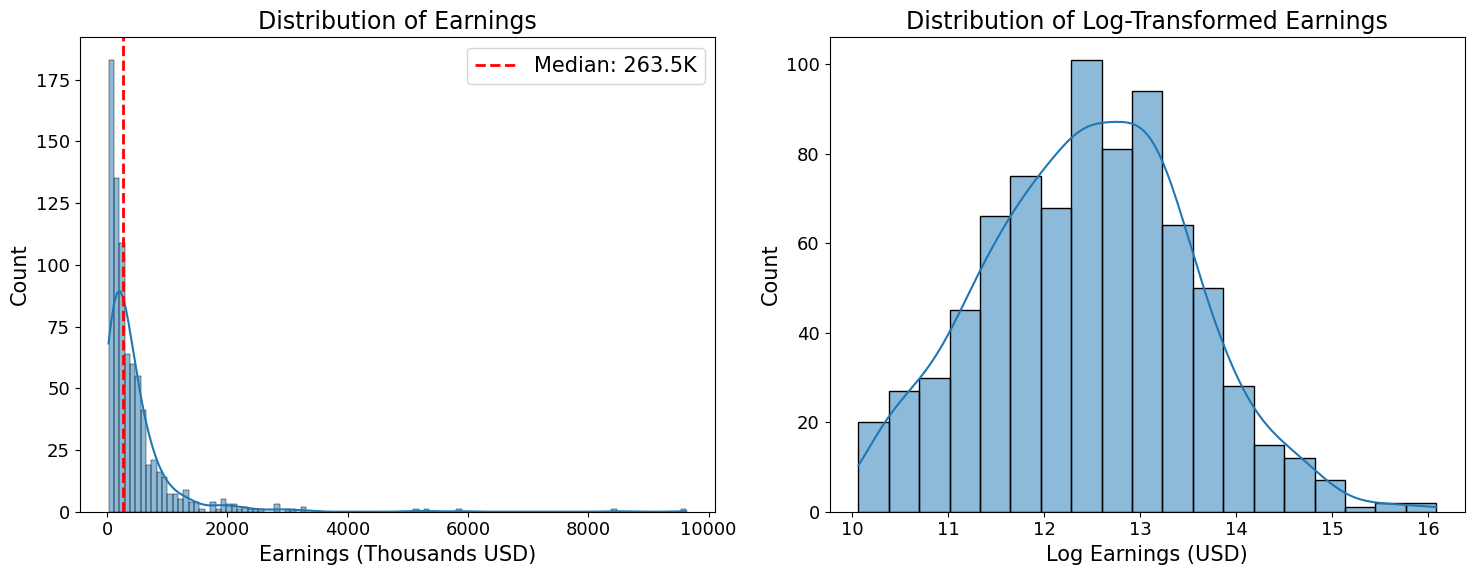

In [24]:
median_value = df.earnings_usd.median() / 1000
print(f'median: {median_value:.0f}K')

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

sns.histplot(df.earnings_usd/1000, kde=True, ax=axes[0])
axes[0].set_xlabel('Earnings (Thousands USD)')
axes[0].set_title('Distribution of Earnings')
axes[0].axvline(x=median_value, color='red', linestyle='--', linewidth=2, label=f'Median: {median_value:.1f}K')
axes[0].legend()

sns.histplot(np.log(df.earnings_usd), kde=True, ax=axes[1])
axes[1].set_xlabel('Log Earnings (USD)')
axes[1].set_title('Distribution of Log-Transformed Earnings')

plt.tight_layout()

Text(0.5, 1.0, 'Distribution of Log-Transformed Stream Time')

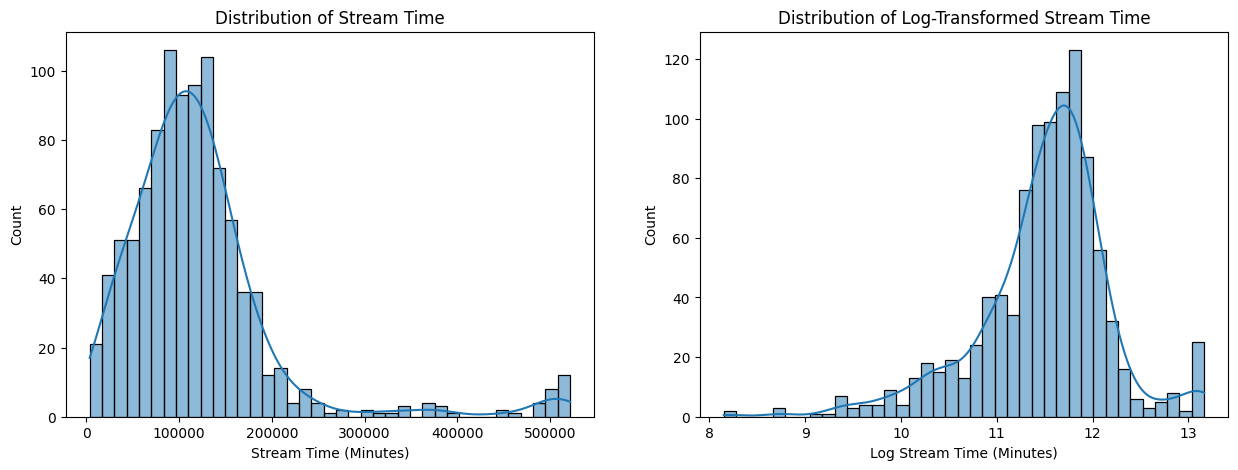

In [11]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

sns.histplot(df.stream_time_minutes, kde=True, ax=axes[0]) 
axes[0].set_xlabel('Stream Time (Minutes)')
axes[0].set_title('Distribution of Stream Time')

sns.histplot(np.log(df.stream_time_minutes), kde=True, ax=axes[1]) 
axes[1].set_xlabel('Log Stream Time (Minutes)')
axes[1].set_title('Distribution of Log-Transformed Stream Time')

Text(0.5, 1.0, 'Distribution of Log-Transformed Watch Time')

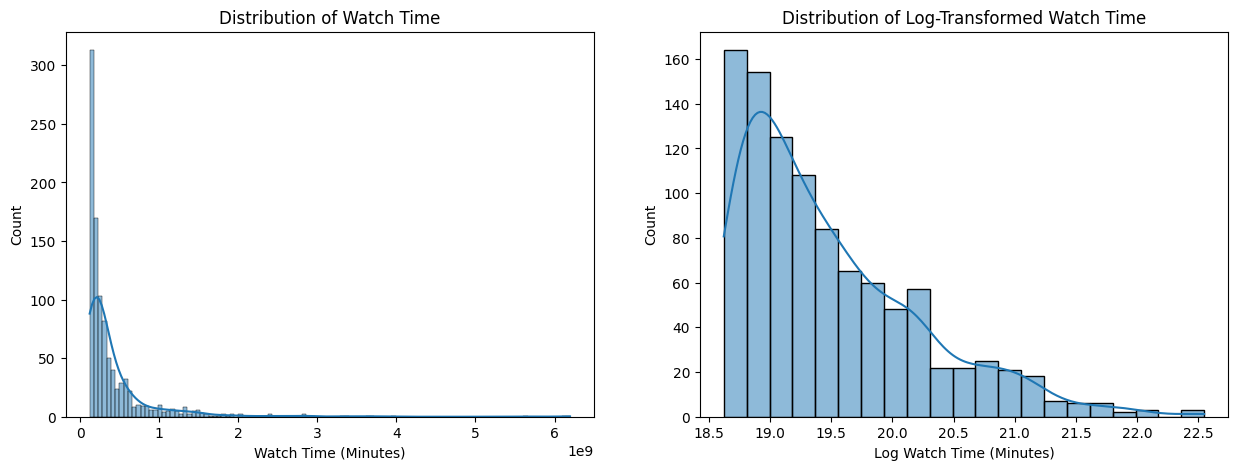

In [12]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

sns.histplot(df.watch_time_minutes, kde=True, ax=axes[0]) 
axes[0].set_xlabel('Watch Time (Minutes)')
axes[0].set_title('Distribution of Watch Time')

sns.histplot(np.log(df.watch_time_minutes), kde=True, ax=axes[1]) 
axes[1].set_xlabel('Log Watch Time (Minutes)')
axes[1].set_title('Distribution of Log-Transformed Watch Time')

Text(0.5, 1.0, 'Distribution of Log-Transformed Average Viewers')

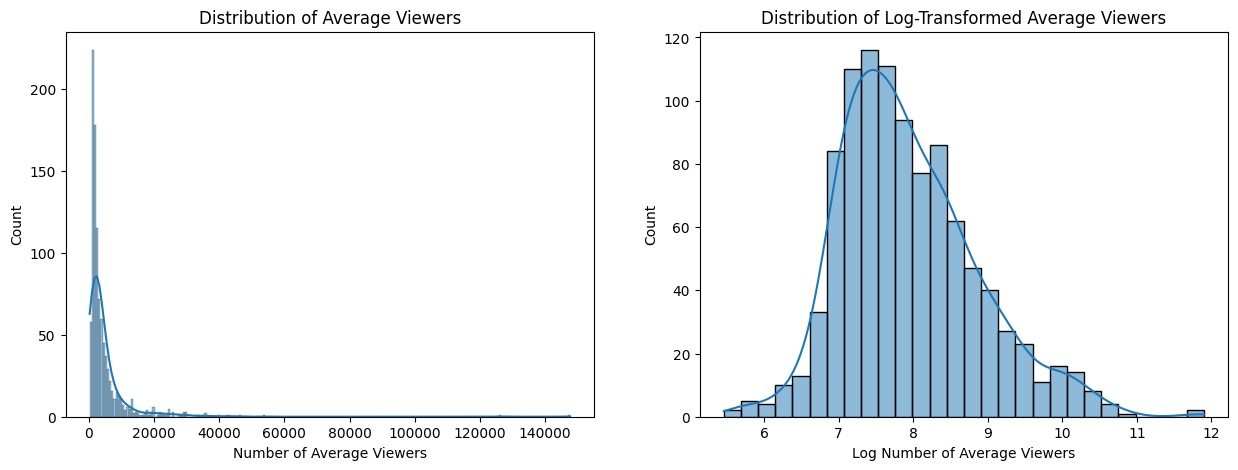

In [13]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

sns.histplot(df.average_viewers, kde=True, ax=axes[0]) 
axes[0].set_xlabel('Number of Average Viewers')
axes[0].set_title('Distribution of Average Viewers')

sns.histplot(np.log(df.average_viewers), kde=True, ax=axes[1]) 
axes[1].set_xlabel('Log Number of Average Viewers')
axes[1].set_title("Distribution of Log-Transformed Average Viewers")

Text(0.5, 1.0, 'Distribution of Log-Transformed Followers')

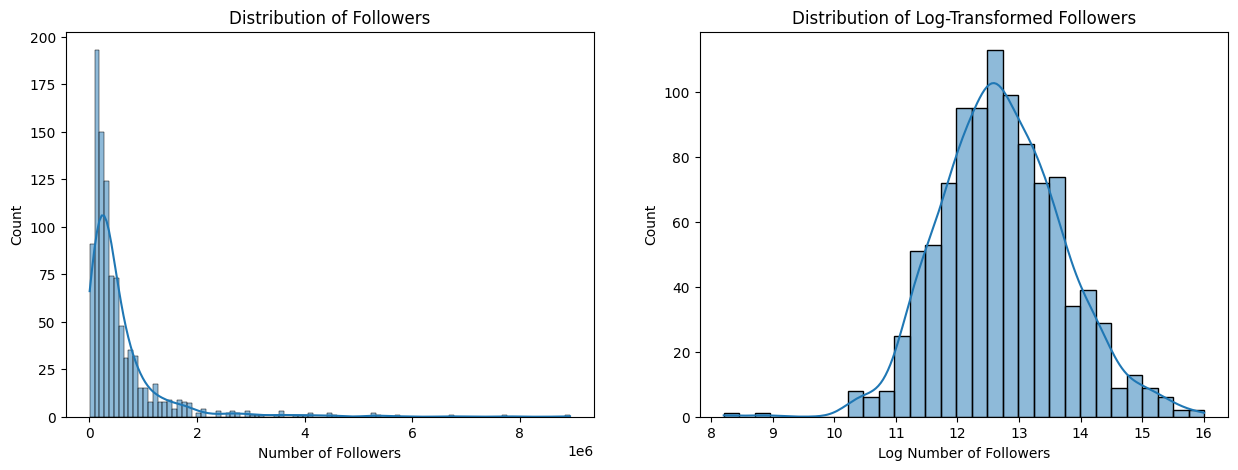

In [14]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

sns.histplot(df.followers, kde=True, ax=axes[0]) 
axes[0].set_xlabel('Number of Followers')
axes[0].set_title("Distribution of Followers")

sns.histplot(np.log(df.followers), kde=True, ax=axes[1]) 
axes[1].set_xlabel('Log Number of Followers')
axes[1].set_title("Distribution of Log-Transformed Followers")

Text(0.5, 1.0, 'Distribution of Followers Gained')

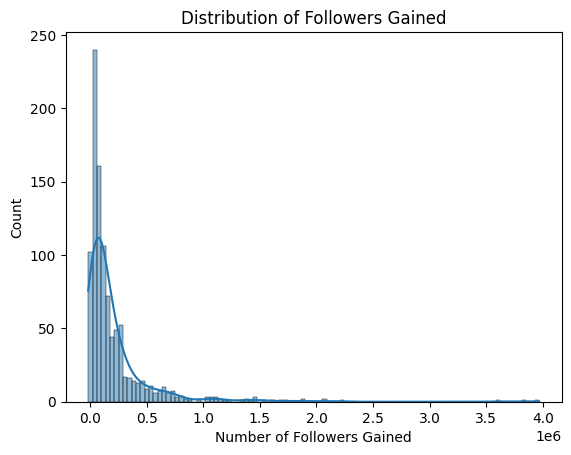

In [15]:
sns.histplot(df.followers_gained, kde=True) 
plt.xlabel('Number of Followers Gained')
plt.title("Distribution of Followers Gained")

In [16]:
df.groupby('partnered').size().sort_values(ascending=False)

partnered
True     978
False     22
dtype: int64

In [17]:
df.groupby('mature').size().sort_values(ascending=False)

mature
False    770
True     230
dtype: int64

In [18]:
df.groupby('language').size().sort_values(ascending=False)

language
English       485
Korean         77
Russian        74
Spanish        68
French         66
Portuguese     61
German         49
Chinese        30
Turkish        22
Italian        17
Polish         12
Thai           11
Japanese       10
Czech           6
Arabic          5
Hungarian       2
Other           1
Greek           1
Slovak          1
Finnish         1
Swedish         1
dtype: int64